In [1]:
import pickle
import pandas as pd
import numpy as np
import os

## data cols

story_edges: The edges in the graph representation of the story.

edge_types: The types of relationships represented by the edges. (Note: No entity encoding is needed)

query_edge: Specifies the source and target nodes for the query. The task is to uncover the hidden relation between these nodes.

query_relation: The answer to the task. the label.

correct_implied_alternatives:

## data splits

max_rule_chain_len

num_unique_variants

max_rules_to_nodes_ratio

max_non_path_atoms

In [ ]:
salient_test_features = ['max_rule_chain_len', 
                         'num_unique_variants',
                         'max_rules_to_nodes_ratio', 
                         'OPEC']


## make the train dataset

In [ ]:
def relabel_edges_to_int(edges):
    """
    edges : list[tuple[Any, Any]]
    returns
        new_edges : list[tuple[int, int]]
        mapping   : dict[Any, int]   # only for non-integer nodes
    """
    # 1) collect the integers already in use
    ints_in_use = {n for e in edges for n in e if isinstance(n, int)}
    next_id = max(ints_in_use, default=-1) + 1

    mapping = {}                       # non-int  ➜  new int

    def get_id(node):
        nonlocal next_id
        if isinstance(node, int):
            return node
        if node not in mapping:        # first time we see this text node
            mapping[node] = next_id
            next_id += 1
        return mapping[node]

    new_edges = [(get_id(u), get_id(v)) for u, v in edges]
    # TODO assign the mapping as self edges?
    return new_edges


def load_data(file_path='data/ambig/nonambig-split/Ver2training_data_all.pkl', salient_test_features=salient_test_features):
    data = pickle.load(open(file_path, 'rb'))
    data_reduced = data[['story_edges', 'edge_types', 'query_edge', 
                         'query_relation', 'correct_implied_alternatives', 
                         'max_non_path_atoms',
                         'other_relationships', *salient_test_features]]


    # relabel some column names
    data_reduced['query_label'] = data_reduced['query_relation'].apply(lambda x: [x]) + data_reduced['other_relationships'].apply(lambda x: list(set(x)))
    data_reduced = data_reduced.rename(columns={'story_edges':'edges', 'edge_types':'edge_labels', 'query_edge':'query_edge', 'query_label':'query_label'})
    data_reduced['edges'] = data_reduced['edges'].map(lambda x: relabel_edges_to_int(x))
    # shuffle the rows
    data_reduced = data_reduced.sample(frac=1, random_state=100).reset_index(drop=True)
    # downsample to save time?
    data_reduced = data_reduced[:12000]
    return data_reduced

def load_amb_data_as_dict(df: pd.DataFrame) -> dict:
	edge_ls = df['story_edges'].tolist()
	edge_labels_ls = df['edge_types'].tolist()
	query_edge_ls = df['query_edge'].tolist()
	query_label_ls = df['query_relation'].tolist()
	data = {'edges':edge_ls,'edge_labels':edge_labels_ls,'query_edge':query_edge_ls,'query_label':query_label_ls}
	return data

/tmp/ipykernel_494273/109124501.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reduced['query_label'] = data_reduced['query_relation'].apply(lambda x: [x]) + data_reduced['other_relationships'].apply(lambda x: list(set(x)))


shape (12000, 12)


<Axes: >

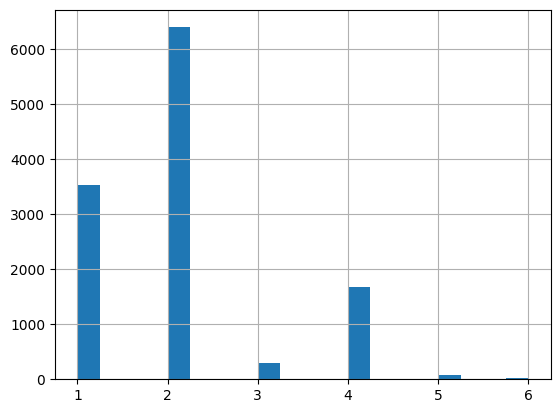

In [ ]:
ambig_path = 'data/ambig/ambig-split/training_data_all.pkl'
ambig_training_data = load_data(ambig_path)
print('shape', ambig_training_data.shape)
ambig_training_data.to_csv('data/ambig/train_ambig.csv')
ambig_training_data.query_label.map(lambda x: len(x)).hist(bins=20)

In [6]:
ambig_training_data['query_edge']

0         (15, 8)
1         (5, 27)
2        (16, 13)
3        (31, 20)
4        (27, 30)
           ...   
11995    (33, 11)
11996    (21, 19)
11997     (6, 25)
11998    (15, 24)
11999      (5, 9)
Name: query_edge, Length: 12000, dtype: object

/tmp/ipykernel_494273/109124501.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reduced['query_label'] = data_reduced['query_relation'].apply(lambda x: [x]) + data_reduced['other_relationships'].apply(lambda x: list(set(x)))


<Axes: >

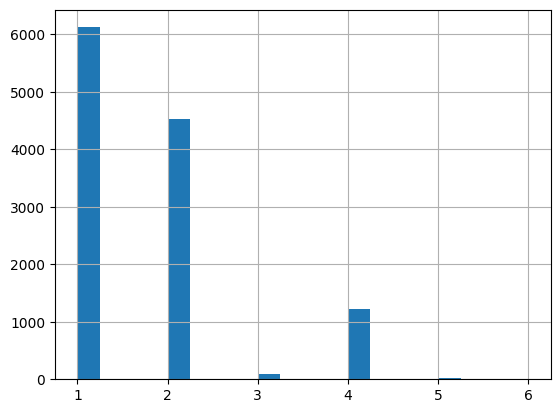

In [7]:
training_data = load_data()
training_data.to_csv('data/ambig/train_no_ambig.csv')
training_data.query_label.map(lambda x: len(x)).hist(bins=20)

<Axes: >

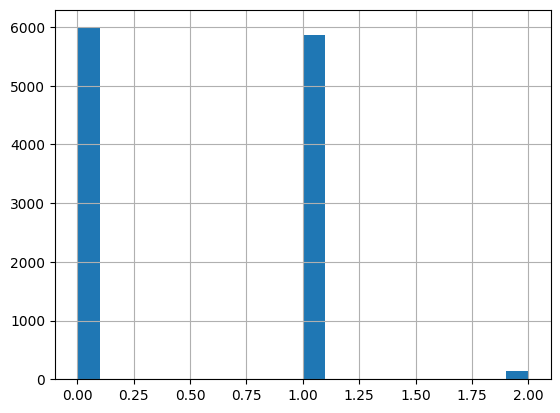

In [8]:
training_data.OPEC.hist(bins=20)

<Axes: >

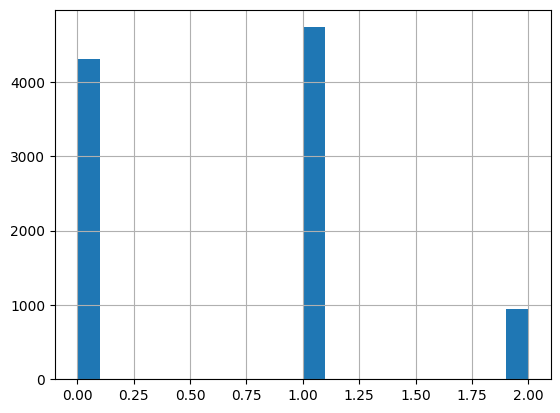

In [42]:
ambig_training_data.OPEC.hist(bins=20)

## make the test splits
## subset 1 splits

In [ ]:
import matplotlib.pyplot as plt
path = '../data/ambig/nonambig-split/Ver2_subset1_long_rules_low_complexity_low_variants.pkl'
data_reduced_test = load_data(path, salient_test_features=salient_test_features[:-1])
data_reduced_test.to_csv('../data/ambig/test_no_ambig_test_d.csv')
ambig_path = '../data/ambig/ambig-split/subset1_long_rules_low_complexity_low_variants.pkl'
ambig_data_reduced_test = load_data(ambig_path, salient_test_features=salient_test_features[:-1])
ambig_data_reduced_test.to_csv('../data/ambig/test_ambig_test_d.csv')

/tmp/ipykernel_1446552/109124501.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reduced['query_label'] = data_reduced['query_relation'].apply(lambda x: [x]) + data_reduced['other_relationships'].apply(lambda x: list(set(x)))
/tmp/ipykernel_1446552/109124501.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reduced['query_label'] = data_reduced['query_relation'].apply(lambda x: [x]) + data_reduced['other_relationships'].apply(lambda x: list(set(x)))


In [19]:
deriv_chain_lens = data_reduced_test['max_rule_chain_len'].unique()
for clen in deriv_chain_lens:
    k = int(clen)
    split = data_reduced_test[data_reduced_test['max_rule_chain_len'] == k]
    print(f"max_rule_chain_len: {k}, num_samples: {split.shape[0]}") 
    split.to_csv(f'data/ambig/test_no_ambig_long_k_{k}.csv')

print('ambig splits')
deriv_chain_lens = ambig_data_reduced_test['max_rule_chain_len'].unique()
for clen in deriv_chain_lens:
    k = int(clen)
    split = ambig_data_reduced_test[ambig_data_reduced_test['max_rule_chain_len'] == k]
    print(f"max_rule_chain_len: {k}, num_samples: {split.shape[0]}") 
    split.to_csv(f'data/ambig/test_ambig_long_k_{k}.csv')

max_rule_chain_len: 8, num_samples: 1248
max_rule_chain_len: 7, num_samples: 908
max_rule_chain_len: 13, num_samples: 29
max_rule_chain_len: 9, num_samples: 627
max_rule_chain_len: 10, num_samples: 325
max_rule_chain_len: 11, num_samples: 138
max_rule_chain_len: 12, num_samples: 58
max_rule_chain_len: 14, num_samples: 10
max_rule_chain_len: 15, num_samples: 2
ambig splits
max_rule_chain_len: 9, num_samples: 208
max_rule_chain_len: 7, num_samples: 305
max_rule_chain_len: 11, num_samples: 41
max_rule_chain_len: 8, num_samples: 428
max_rule_chain_len: 10, num_samples: 104
max_rule_chain_len: 12, num_samples: 25
max_rule_chain_len: 13, num_samples: 6
max_rule_chain_len: 14, num_samples: 3
max_rule_chain_len: 15, num_samples: 2
max_rule_chain_len: 16, num_samples: 1


In [26]:
import os
ratios = data_reduced_test['max_rules_to_nodes_ratio'].unique()
ratios_proper = []
ratios_proper_a = []
for ratio in ratios:
    k = ratio
    split = data_reduced_test[data_reduced_test['max_rules_to_nodes_ratio'] == k]
    print(f"max_rules_to_nodes_ratio: {k}, num_samples: {split.shape[0]}") 
    fname = f'data/ambig/test_no_ambig_long_mrnr_{k}.csv'
    split.to_csv(fname)
    if os.path.exists(fname) and split.shape[0] < 4:
        # remove this file
        os.remove(fname)
        print(f"removed {fname}")
    else:
        ratios_proper.append(ratio.item())
ambig_ratios = ambig_data_reduced_test['max_rules_to_nodes_ratio'].unique()
for ratio in ambig_ratios:
    k = ratio
    split = ambig_data_reduced_test[ambig_data_reduced_test['max_rules_to_nodes_ratio'] == k]
    print(f"max_rules_to_nodes_ratio: {k}, num_samples: {split.shape[0]}") 
    fname = f'data/ambig/test_ambig_long_mrnr_{k}.csv'
    split.to_csv(fname)
    if os.path.exists(fname) and split.shape[0] < 4:
        # remove this file
        os.remove(fname)
        print(f"removed {fname}")
    else:
        ratios_proper_a.append(ratio.item())

max_rules_to_nodes_ratio: 1.17, num_samples: 905
max_rules_to_nodes_ratio: 1.33, num_samples: 493
max_rules_to_nodes_ratio: 1.4, num_samples: 642
max_rules_to_nodes_ratio: 1.0, num_samples: 245
max_rules_to_nodes_ratio: 1.14, num_samples: 289
max_rules_to_nodes_ratio: 1.5, num_samples: 203
max_rules_to_nodes_ratio: 1.29, num_samples: 218
max_rules_to_nodes_ratio: 1.43, num_samples: 132
max_rules_to_nodes_ratio: 1.38, num_samples: 58
max_rules_to_nodes_ratio: 1.25, num_samples: 56
max_rules_to_nodes_ratio: 1.22, num_samples: 12
max_rules_to_nodes_ratio: 1.12, num_samples: 42
max_rules_to_nodes_ratio: 1.44, num_samples: 12
max_rules_to_nodes_ratio: 1.11, num_samples: 10
max_rules_to_nodes_ratio: 0.88, num_samples: 16
max_rules_to_nodes_ratio: 1.18, num_samples: 2
removed data/ambig/test_no_ambig_long_mrnr_1.18.csv
max_rules_to_nodes_ratio: 1.1, num_samples: 4
max_rules_to_nodes_ratio: 0.89, num_samples: 2
removed data/ambig/test_no_ambig_long_mrnr_0.89.csv
max_rules_to_nodes_ratio: 1.2, 

## subset 2 splits

In [ ]:
# NOTE OPEC 
# df_train['OPEC'] = df_train[['max_non_path_contradictions', 'max_non_path_atoms']].max(axis=1)
path = 'data/ambig/nonambig-split/Ver2_subset3_2_short_rules_many_non_path_atoms.pkl'
ambig_path = 'data/ambig/ambig-split/subset2_short_rules_high_variants.pkl'
data_reduced_test = load_data(path, salient_test_features=salient_test_features[:-1])
ambig_data_reduced_test = load_data(ambig_path, salient_test_features=salient_test_features[:-1])

/tmp/ipykernel_1827253/109124501.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reduced['query_label'] = data_reduced['query_relation'].apply(lambda x: [x]) + data_reduced['other_relationships'].apply(lambda x: list(set(x)))
/tmp/ipykernel_1827253/109124501.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reduced['query_label'] = data_reduced['query_relation'].apply(lambda x: [x]) + data_reduced['other_relationships'].apply(lambda x: list(set(x)))


In [9]:
ambig_data_reduced_test.to_csv('data/ambig/test_ambig_test_w.csv')

In [43]:
brls = data_reduced_test['num_unique_variants'].unique()
for clen in brls:
    k = int(clen)
    split = data_reduced_test[data_reduced_test['num_unique_variants'] == k]
    print(f"num_unique_variants: {k}, num_samples: {split.shape[0]}") 
    split.to_csv(f'data/ambig/test_no_ambig_short2_b_{k}.csv')

print('ambig splits')
brls_a = ambig_data_reduced_test['num_unique_variants'].unique()
for clen in brls_a:
    k = int(clen)
    split = ambig_data_reduced_test[ambig_data_reduced_test['num_unique_variants'] == k]
    print(f"num_unique_variants: {k}, num_samples: {split.shape[0]}") 
    split.to_csv(f'data/ambig/test_ambig_short2_b_{k}.csv')

num_unique_variants: 1, num_samples: 1683
ambig splits
num_unique_variants: 6, num_samples: 3964
num_unique_variants: 8, num_samples: 388
num_unique_variants: 11, num_samples: 106
num_unique_variants: 7, num_samples: 1707
num_unique_variants: 9, num_samples: 98
num_unique_variants: 15, num_samples: 72
num_unique_variants: 10, num_samples: 52
num_unique_variants: 12, num_samples: 64
num_unique_variants: 14, num_samples: 1


## subset 3

In [ ]:
path = 'data/ambig/nonambig-split/Ver2_subset3_short_rules_high_complexity_no_contradiction.pkl'
ambig_path = 'data/ambig/ambig-split/subset3_short_rules_high_complexity_no_contradiction.pkl'
data_reduced_test = load_data(path, salient_test_features=salient_test_features[:-1])
ambig_data_reduced_test = load_data(ambig_path, salient_test_features=salient_test_features[:-1])

/tmp/ipykernel_494273/109124501.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reduced['query_label'] = data_reduced['query_relation'].apply(lambda x: [x]) + data_reduced['other_relationships'].apply(lambda x: list(set(x)))
/tmp/ipykernel_494273/109124501.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reduced['query_label'] = data_reduced['query_relation'].apply(lambda x: [x]) + data_reduced['other_relationships'].apply(lambda x: list(set(x)))


In [12]:
data_reduced_test.to_csv('data/ambig/test_no_ambig_test_bl.csv')
ambig_data_reduced_test.to_csv('data/ambig/test_ambig_test_bl.csv')

In [97]:
for i in ['num_unique_variants']:
    for j in ['max_rule_chain_len']:
        if i != j:
            salient_range_i = ambig_data_reduced_test[i].unique()
            salient_range_j = ambig_data_reduced_test[j].unique()
            for i_iter in salient_range_i:
                for j_iter in salient_range_j:
                    split = ambig_data_reduced_test[(ambig_data_reduced_test[i] == i_iter) & (ambig_data_reduced_test[j] == j_iter)]
                    split.to_csv(f'data/ambig/test_ambig_short_b_{i_iter}_k_{j_iter}.csv')
                    print(f"i: {i}, j: {j}, i_iter: {i_iter}, j_iter: {j_iter}, num_samples: {split.shape[0]}")

i: num_unique_variants, j: max_rule_chain_len, i_iter: 2, j_iter: 5.0, num_samples: 625
i: num_unique_variants, j: max_rule_chain_len, i_iter: 2, j_iter: 4.0, num_samples: 2520
i: num_unique_variants, j: max_rule_chain_len, i_iter: 2, j_iter: 6.0, num_samples: 173
i: num_unique_variants, j: max_rule_chain_len, i_iter: 1, j_iter: 5.0, num_samples: 473


i: num_unique_variants, j: max_rule_chain_len, i_iter: 1, j_iter: 4.0, num_samples: 2471
i: num_unique_variants, j: max_rule_chain_len, i_iter: 1, j_iter: 6.0, num_samples: 92
i: num_unique_variants, j: max_rule_chain_len, i_iter: 3, j_iter: 5.0, num_samples: 438
i: num_unique_variants, j: max_rule_chain_len, i_iter: 3, j_iter: 4.0, num_samples: 1505
i: num_unique_variants, j: max_rule_chain_len, i_iter: 3, j_iter: 6.0, num_samples: 112
i: num_unique_variants, j: max_rule_chain_len, i_iter: 4, j_iter: 5.0, num_samples: 254
i: num_unique_variants, j: max_rule_chain_len, i_iter: 4, j_iter: 4.0, num_samples: 781
i: num_unique_variants, j: max_rule_chain_len, i_iter: 4, j_iter: 6.0, num_samples: 57
i: num_unique_variants, j: max_rule_chain_len, i_iter: 5, j_iter: 5.0, num_samples: 115
i: num_unique_variants, j: max_rule_chain_len, i_iter: 5, j_iter: 4.0, num_samples: 342
i: num_unique_variants, j: max_rule_chain_len, i_iter: 5, j_iter: 6.0, num_samples: 42


## OPEC datagen

In [ ]:
path = '../data/ambig/nonambig-split/Ver2_subset3_2_short_rules_many_non_path_atoms.pkl'
ambig_path = '../data/ambig/ambig-split/subset3_2_short_rules_many_non_path_atoms.pkl'
data_reduced_test = load_data(path, salient_test_features=salient_test_features[:-1])
ambig_data_reduced_test = load_data(ambig_path, salient_test_features=salient_test_features[:-1])

/tmp/ipykernel_1446552/109124501.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reduced['query_label'] = data_reduced['query_relation'].apply(lambda x: [x]) + data_reduced['other_relationships'].apply(lambda x: list(set(x)))
/tmp/ipykernel_1446552/109124501.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reduced['query_label'] = data_reduced['query_relation'].apply(lambda x: [x]) + data_reduced['other_relationships'].apply(lambda x: list(set(x)))


In [6]:
data_reduced_test.shape, ambig_data_reduced_test.shape

((1683, 11), (216, 11))

In [8]:
data_reduced_test.to_csv('../data/ambig/test_no_ambig_test_opec.csv')
ambig_data_reduced_test.to_csv('../data/ambig/test_ambig_test_opec.csv')

<Axes: >

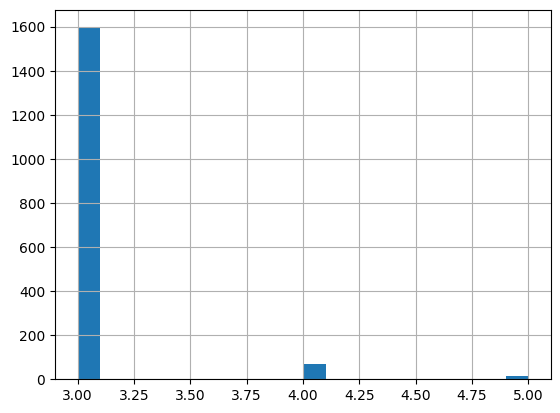

In [23]:
data_reduced_test['max_non_path_atoms'].hist(bins=20)

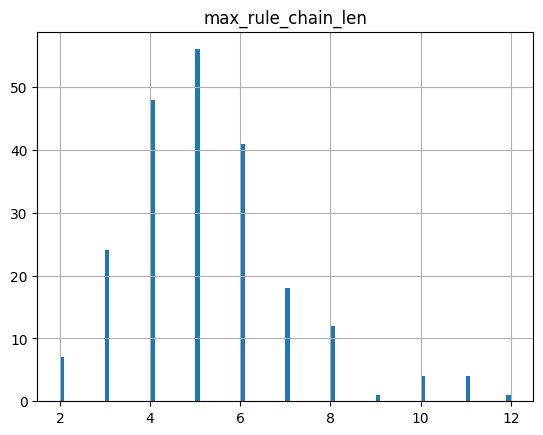

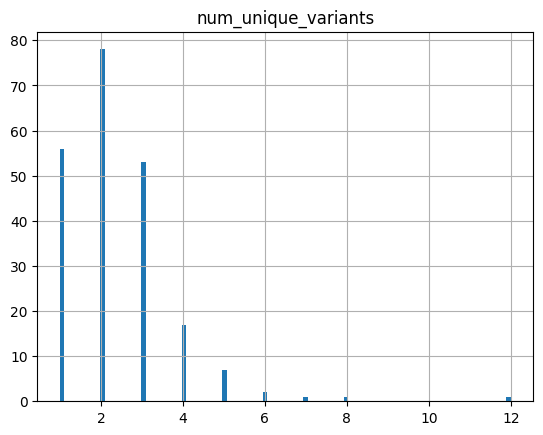

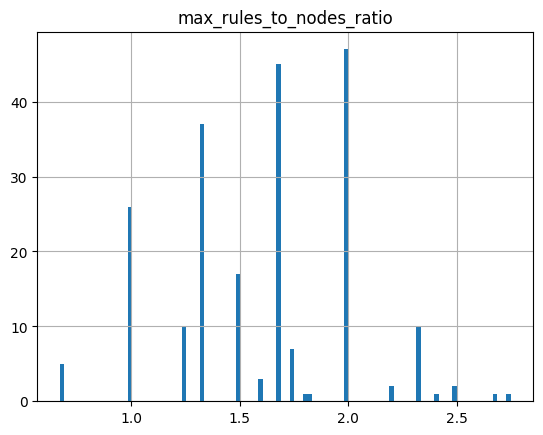

In [18]:
for i in salient_test_features[:-1]:
    plt.figure()
    ambig_data_reduced_test[i].hist(bins=100)
    plt.title(i)

<Axes: >

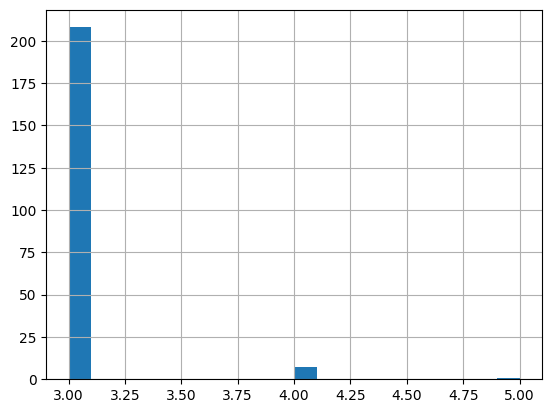

In [10]:
ambig_data_reduced_test['max_non_path_atoms'].hist(bins=20)

In [11]:
OPEC = data_reduced_test['max_non_path_atoms'].unique()
for clen in OPEC:
    k = int(clen)
    split = data_reduced_test[data_reduced_test['max_non_path_atoms'] == k]
    print(f"max_non_path_atoms: {k}, num_samples: {split.shape[0]}") 
    split.to_csv(f'../data/ambig/test_no_ambig_OPEC_{k}.csv')


OPEC_a = ambig_data_reduced_test['max_non_path_atoms'].unique()
for clen in OPEC_a:
    k = int(clen)
    split = ambig_data_reduced_test[ambig_data_reduced_test['max_non_path_atoms'] == k]
    print(f"max_non_path_atoms: {k}, num_samples: {split.shape[0]}") 
    split.to_csv(f'../data/ambig/test_ambig_OPEC_{k}.csv')

max_non_path_atoms: 3, num_samples: 1597
max_non_path_atoms: 4, num_samples: 70
max_non_path_atoms: 5, num_samples: 16
max_non_path_atoms: 3, num_samples: 208
max_non_path_atoms: 4, num_samples: 7
max_non_path_atoms: 5, num_samples: 1


In [2]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report, f1_score

f1_score([1, 0, 1, 1], [1, 0, 0, 1], average='macro')

0.7333333333333334

## check $\mathcal{R}$ coverage is the same for train and test

In [54]:
def get_unique_labels(data):
    list_of_lists = data['edge_labels'].tolist()
    # collapse to single set
    unique_labels = set()
    for sublist in list_of_lists:
        for item in sublist:
            unique_labels.add(item)
    # do the same for query labels
    list_of_labels = data['query_label'].tolist()
    for l_item in list_of_labels:
        for item in l_item:
            unique_labels.add(item)
    label_set = unique_labels
    return label_set
test_label_set = get_unique_labels(data_reduced_test)
train_label_set = get_unique_labels(training_data)

In [55]:
len(test_label_set), len(train_label_set)

(57, 57)

In [56]:
training_data.shape

(13244, 11)

In [57]:
data_reduced_test.shape

(3345, 11)

In [58]:
test_label_set == train_label_set

True

## Depth first analysis

{"('long_k', 7)": 0.5901639461517334, "('long_k', 8)": 0.7242990732192993, "('long_k', 9)": 0.6586538553237915, "('long_k', 10)": 0.682692289352417, "('long_k', 11)": 0.8292682766914368, "('long_k', 12)": 0.8799999952316284, "('long_k', 13)": 0.6666666865348816, "('long_mrnr', 1.14)": 0.65625, "('long_mrnr', 1.17)": 0.7148148417472839, "('long_mrnr', 1.0)": 0.6774193644523621, "('long_mrnr', 1.4)": 0.6214689016342163, "('long_mrnr', 1.29)": 0.6805555820465088, "('long_mrnr', 1.43)": 0.6538461446762085, "('long_mrnr', 1.5)": 0.6575342416763306, "('long_mrnr', 1.38)": 0.8999999761581421, "('long_mrnr', 1.33)": 0.692307710647583, "('long_mrnr', 1.12)": 0.6666666865348816, "('long_mrnr', 1.25)": 0.6499999761581421, "('long_mrnr', 0.88)": 0.75, "('OPEC', 3)": 0.028846153989434242, "('OPEC', 4)": 0.0, "('s3_short_k_branches_a', (4, 1)": 0.6357749700546265, "('s3_short_k_branches_a', (4, 2)": 0.6146825551986694, "('s3_short_k_branches_a', (4, 3)": 0.5960133075714111, "('s3_short_k_branches_a'

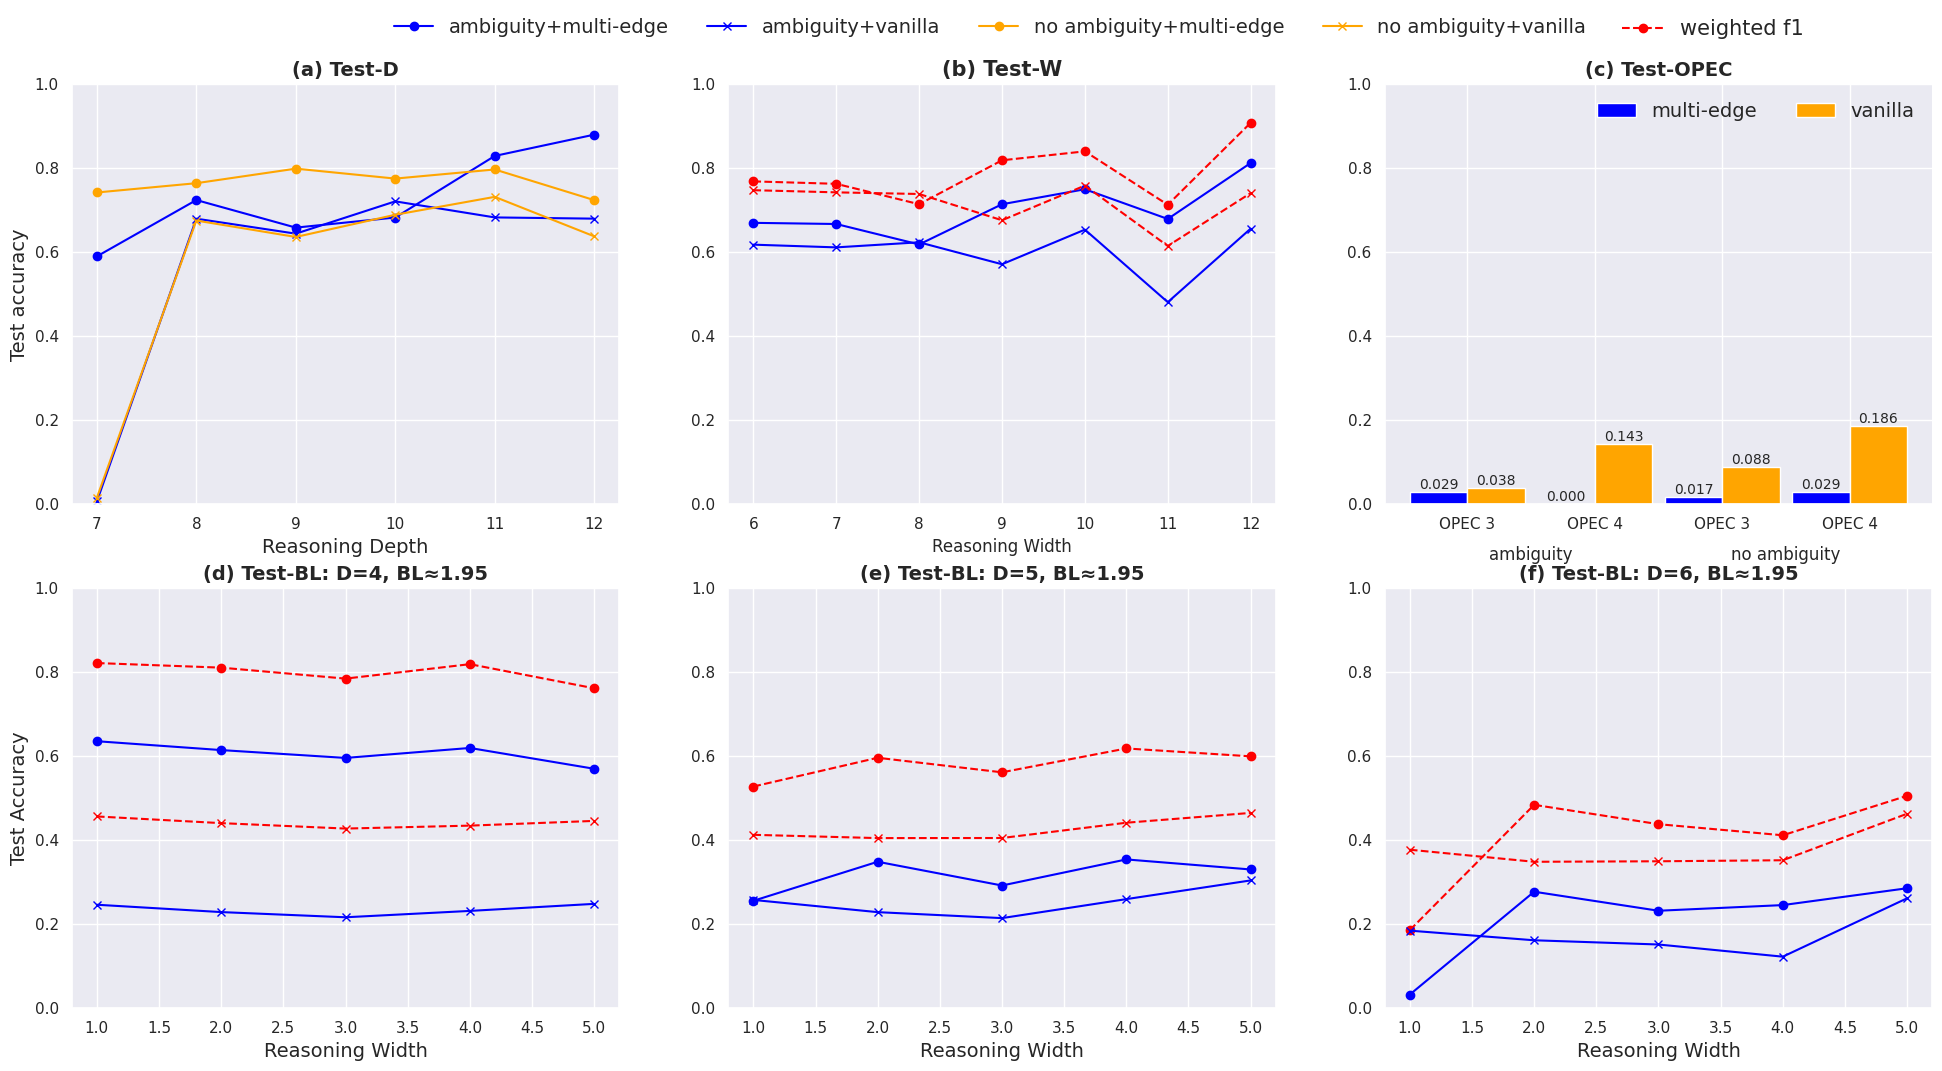

In [100]:
import matplotlib.pyplot as plt
import json
import numpy as np
import os
import seaborn as sns
sns.set()

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(24, 12))
ax = ax.ravel()
for dataset in ['ambig', 'no_ambig']:
    if dataset == 'ambig':
        c = 'blue'
        label = 'ambiguity'
    else:
        c = 'orange'
        label = 'no ambiguity'
    for model in ['input', 'no_input']:
        if model == 'input':
            model_label = 'multi-edge'
            m = 'o'
        else:
            m = 'x'
            model_label = 'vanilla'
        file = json.load(open(f'../results/edge_t_{dataset}_{model}_rat/results.json', 'r'))
        accs = []
        for k in [7,8,9,10,11,12]:
            hash_id = f"('long_k', {k})"
            accs.append(file['test_accs'][hash_id])
        ax[0].plot([7,8,9,10,11,12], accs, label=f'{label}+{model_label}', color=c, marker=m)
ax[0].set_xlabel('Reasoning Depth', fontsize=14)
ax[0].set_ylabel('Test accuracy', fontsize=14)
ax[0].set_ylim(0, 1)
ax[0].set_title('(a) Test-D', fontweight='bold', fontsize=14)
ax[0].legend(frameon=False, bbox_to_anchor=(2.8, 1.2), ncol=4, fontsize=14)

for dataset in ['ambig']:
    if dataset == 'ambig':
        c = 'blue'
    for model in ['input', 'no_input']:
        if model == 'input':
            m = 'o'
        else:
            m = 'x'
        file = json.load(open(f'../results/edge_t_{dataset}_{model}_rat/results.json', 'r'))
        accs = []
        macro_f1s = []
        for k in [6,7,8,9,10,11,12]:
            hash_id = f"('s2_ood_short_k_branches_a', ({k}))"
            accs.append(file['test_accs'][hash_id])
            macro_f1s.append(file['macro_f1s'][hash_id])
        ax[1].plot([6,7,8,9,10,11,12], accs, label=None, color=c, marker=m)
        ax[1].plot([6,7,8,9,10,11,12], macro_f1s, label=f'weighted f1' if model == 'input' else None, color='red', linestyle='--', marker=m)
ax[1].set_xlabel('Reasoning Width')
# ax[1].set_ylabel('Metric')
ax[1].legend(frameon=False, bbox_to_anchor=(2., 1.2), fontsize=15)
ax[1].set_ylim(0, 1)
ax[1].set_title('(b) Test-W', fontweight='bold', fontsize=15)

# --- data (replace with your real accuracies) -----------------
datasets     = ['ambig', 'no_ambig']
dataset_bar_xlabel = []
acc_input    = []      # “input” accuracies
acc_noinput  = []      # “no_input” accuracies

for dataset in datasets:
    for opec in [3,4]:
        dataset_bar_xlabel.append(f'OPEC {opec}')


for model in ['input', 'no_input']:
    for dataset in datasets:
        for opec in [3,4]:
            file = json.load(open(f'../results/edge_t_{dataset}_{model}_rat/results.json', 'r'))
            
            hash_id = f"('OPEC', {opec})"
            acc = file['test_accs'][hash_id]
            print(file['test_accs'])
            if model == 'input':
                acc_input.append(acc)
            else:
                acc_noinput.append(acc) 


# --- bar positions -------------------------------------------
x      = np.arange(len(dataset_bar_xlabel))   # 0, 1
width  = 0.45                       # bars just touch (0.45 ≈ ½ the gap)

b1 = ax[2].bar(x - width/2, acc_input,   width, label='multi-edge',    color='blue')
b2 = ax[2].bar(x + width/2, acc_noinput, width, label='vanilla', color='orange')

# --- cosmetics -----------------------------------------------
ax[2].set_xticks(x, dataset_bar_xlabel)
# ax[2].set_ylabel('accuracy')
ax[2].set_ylim(0, 1)                   # accuracies live in [0, 1]
ax[2].legend(frameon=False, ncol=2, fontsize=14)
ax[2].spines[['right','top']].set_visible(False)

# value labels on top
for bars in (b1, b2):
    ax[2].bar_label(bars, fmt='%.3f', padding=0, fontsize=10)

group_centres = [0.5, 2.5]
group_names   = ['ambiguity', 'no ambiguity']

for xc, name in zip(group_centres, group_names):
    # y = -0.15 is a little below the x-axis, in axis-units
    ax[2].text(xc, -0.1, name,
            ha='center', va='top',
            transform=ax[2].get_xaxis_transform())

ax[2].set_title('(c) Test-OPEC', fontweight='bold', fontsize=14)

for dataset in ['ambig']:
    for model in ['input', 'no_input']:
        file = json.load(open(f'../results/edge_t_{dataset}_{model}_rat/results.json', 'r'))
        for (plot_i, k), letter in zip(enumerate([4,5,6]), ['(d)', '(e)', '(f)']):
            accs = []
            macro_f1s = []
            for brl in [1,2,3,4,5]:
                hash_id = f"('s3_short_k_branches_a', ({k}, {brl})"
                acc = file['test_accs'][hash_id] 
                macro_f1 = file['macro_f1s'][hash_id]
                accs.append(acc)
                macro_f1s.append(macro_f1)
            if model == 'input':
                marker = 'o'
            else:
                marker = 'x'
            ax[plot_i+3].plot([1,2,3,4,5], accs, label=f'{dataset} {model}', color='blue', marker=marker)
            ax[plot_i+3].plot([1,2,3,4,5], macro_f1s, label=f'{dataset} {model} macro f1', color='red', linestyle='--', marker=marker)
            ax[plot_i+3].set_title(f'{letter} Test-BL: D={k}, BL≈1.95', fontweight='bold', fontsize=14)
            ax[plot_i+3].set_ylim(0, 1)
            ax[plot_i+3].set_xlabel('Reasoning Width', fontsize=14)
ax[3].set_ylabel('Test Accuracy', fontsize=14)
    
# fig.tight_layout(pad=0.1)
# plt.show()
fig.savefig('edge_rat_depth_first_3x3.pdf', dpi=300, bbox_inches='tight')